# Importing  libraries

In [101]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

# Loading the Dataset

In [102]:
#reaf csv file 
df1= pd.read_csv(r"C:\Users\PRATHAMESH\Desktop\bcdata set\banglore home prices\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Getting some insight from the data and making the data suitable for modeling

In [103]:
#Show data dimention
df1.shape

(13320, 9)

In [104]:
#Group data by area type to get more information
df1.groupby('area_type')['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [105]:
# droping some object attributes
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head() 
# We also create a new data frame in case we get a abrupt accuracy.Also this is a good habit incase you want to compare accuracies in the end.

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [106]:
#This code here tells us the number of missing enteris in each column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [107]:
#DROPPING ALL NA VALUES
#Again a new data frame after some major changes in previous data frameof data, will drop them.
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [108]:
df3.shape

(13246, 5)

# clean size column

In [109]:
#size column has more than expression to show the house size(BHK,RK,bedroom).

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

WE SEE DATA IS ENTERED IN BHK OR BEDROOM FORM, BOTH OF THEM MEAN THE SAME SO WE WOULD PICK JUST THE NUMBER FROM THIS COLUMN AND PUT IT IN NEW COLUMN FOR EASY PREDICTION.

In [110]:
# creating a new col 'bhk' and storing the no. of bedrooms
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\PRATHA~1\AppData\Local\Temp/ipykernel_10464/2580179853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [111]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [112]:
#NEXT WE SEARCH FOR ANY OUTLIERS.
df3["bhk"].unique()
#we see 43 and 24 bhk which may be wrong

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [113]:
#Check houses have more than 20 bedrooms.
df3[df3.bhk>20]
#WE CAN SEE IT IS AN ERROR SINCE SQFT IS VERY LESS AND BHK IS VERY HIGH

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


MAJOR PROBLEM IN TOTAL_SQFT BECAUSE IT HAS DATA IN DIFFERENT UNITS AND RANGE: EG- 8000-7500, 1331-1350, 35.56 perch......

In [114]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [115]:
# converting sqft values to float
def is_float(x):
    try:
        float(x)
    except:
        
        return False
    return True

In [116]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [117]:
# converting the range values to the average of those two values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [118]:
convert_sqft_to_num('2166')

2166.0

In [119]:
df4 = df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [120]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [121]:
(2100+2850)/2


2475.0

In [122]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


# Feature Engineering

Creating price_per_sqft

Later this would help remove the outliers (we saw two in outliers in bhk(24,42))

In [123]:
# creating a new col 'price_per_sqft' and assigning the price value per sqft
df5 = df4.copy()
df5['prices_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,prices_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Location

In this column we have high unique values(1304)and it is impossible to know every value and use it for prediction. Thus we check which area(LOCATION) has maximum repetation in our data. Any location with repetation less than 10 can be replaced as "others".

AFTER DOING THIS WE WOULD HAVE ONLY 242 UNIQUE VALUES IN LOCATION

In [124]:
len(df5.location.unique())
#These are the unique(caterogircally different values) in location before our cleaning

1304

In [125]:
#Basic data observation
df5.location = df5.location.apply(lambda x: x.strip())#Stripping any whitespaces
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [126]:
len(location_stats[location_stats<=10])
# THEREFORE WE SEE THAT OUT OF 1304 ROWS ALMOST 1063 ROWS HAVE LESS TAHN 10 REPETATION SO RATHER TAHN LOSING THIS DATA WE PLACE THEM UNDER "OTHER"

1052

In [127]:
#A new data frame
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [128]:
len(df5.location.unique())

1293

In [129]:
"""using lambda func we place these 1063 in a location="other"""
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x) 
len(df5.location.unique())

242

In [130]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,prices_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [131]:
#600/6

# Removing outliers

In [132]:
""" IN THIS DATA SET WE HAVE (BHK AND TOTAL_SQFT) THEREFORE WE CAN SEE ANY OUTLIERS SINCE BOTH THESE VALUES ARE CONNECTED"""
""" WE DIVIDE TOTAL_SQFT BY BHK IF THE ANSWER IS UNUSUALLY SMALL(<300) THEN ITS AN OUTLIER"""
# FOR EG------TOTAL_SQFT = 1000 AND BHK = 6  (1000/6<300) THEREFORE AN OUTLIER SINCE A SINGLE BEDROOM TAKES ABOUT 300 SQFT MINIMUM
df5[df5.total_sqft/df5.bhk<300].head() #this would give us first five outliers

,location,size,total_sqft,bath,price,bhk,prices_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [133]:
df5.shape

(13246, 7)

In [134]:
#REMOVING OUTLIERS
df6 = df5 [~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

# Check price_per_sqft column

In [135]:
#FINDING MORE OUTLIERS
df6.prices_per_sqft.describe()
#MIN is very less (e+03)

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: prices_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470.588235, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [136]:
#FUNCTION TO REMOVE OUTLIERS(ANY VALUEOF DATA IN RANGE OF MEAN-STANDARD DEVIATION AND MEAN+STANDARD DEVIATION IS OBMITTED)
#(M-ST<VALUE<=M+ST) NICE LOGIC

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.prices_per_sqft)
        st = np.std(subdf.prices_per_sqft)
        reduced_df = subdf[(subdf.prices_per_sqft>(m-st)) & (subdf.prices_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index =True)
    return df_out 

df7 = remove_pps_outliers(df6)
df7.shape
#therefor we removed approx 2000 outliers
#For any data scientist it is very important to remove outliers and clean the data.
#Getting a good accuracy becomes relatively easier whe your data is clean and easy to read.


(10241, 7)

# Analyse the relation between the bedroom number and price

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

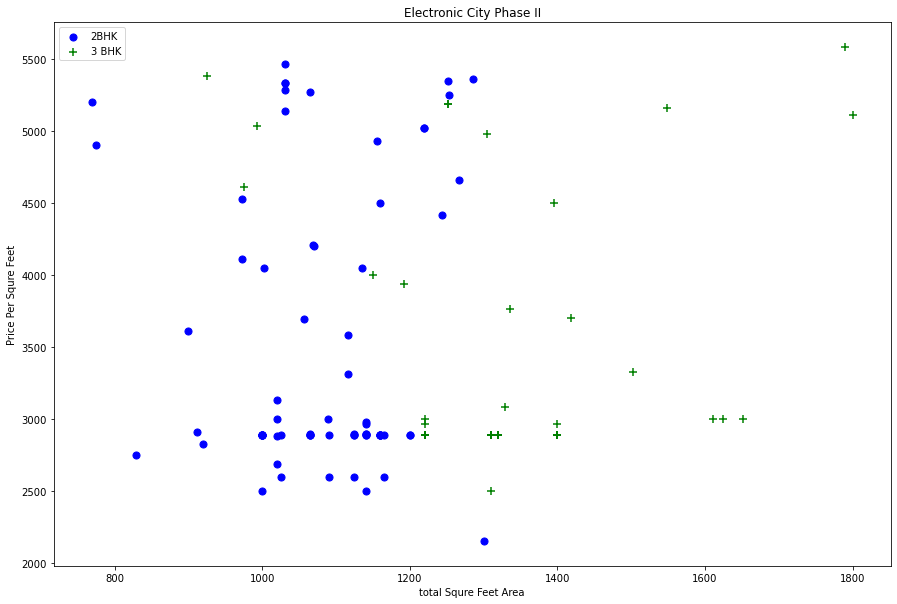

In [137]:
#NOW CHECKING IF 2BHK AND 3BHK HAVE SAME PRICE IN SIMILAR LOCATION OF SAME TOTAL_SQFT
# WE PLOT A SCATTER PLOT
#THE PLOT WOULD TAKE A SPECIFIC LOCATION AND DATAFRAME AS INPUT
#IT WOULD COMPARE 2BHK AND 3BHK PRICE WITH SQFT AS A PARAMETER
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.prices_per_sqft,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.prices_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('total Squre Feet Area')
    plt.ylabel('Price Per Squre Feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Electronic City Phase II') 
# WE CAN SEE WHEN SAME SQFT 2BHK IS OF HIGHER PRICE THAN 3BHK THUS THIS COULD CREATE PRBEL IN PREDICTION SO REMOVE ALL 3BHK WITH SAME SQFT AS OF 2BHK AND LESS PRICE

WE WILL REMOVE ALL 3BHK WITH SAME LOCATION AS 2BHK and at a lesser price.

We will do the same with any 2bhk flat with less price than 1bhk if in sam elocation and same sqft.

In [138]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df  in location_df.groupby('location'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.prices_per_sqft,),
                'std':np.std(bhk_df.prices_per_sqft,),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df  in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.prices_per_sqft,(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
# You may find this a little difficult but give it a 5 min read.
df8 = remove_bhk_outliers(df7)
df8.shape

(10241, 7)

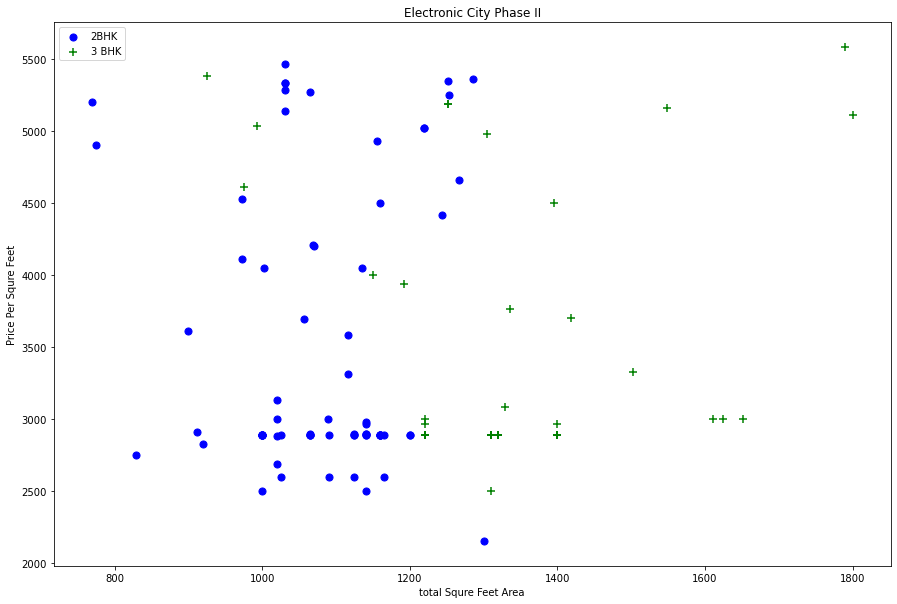

In [139]:
# NOW ALMOST ALL COINCIDING POINTS ARE REMOVED
plot_scatter_chart(df8,'Electronic City Phase II')

#### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'count')

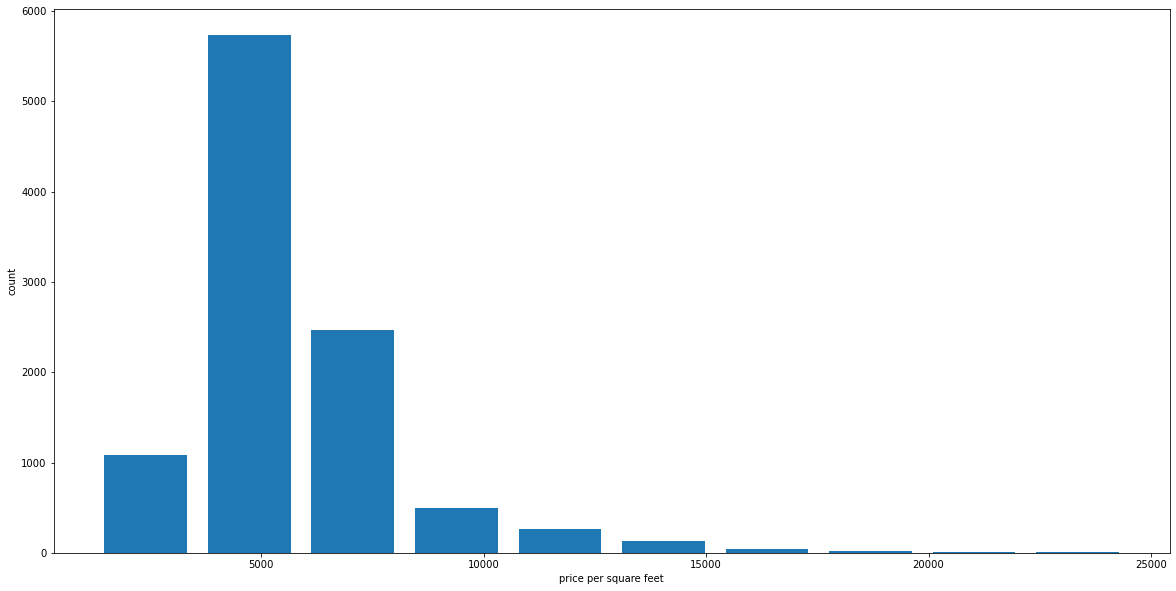

In [140]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.prices_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [141]:
#WE SEE MAX DATA POINTS LIE FROM 0 TO 10,000 SQFT
#EXPLAINING BATHROOM FEATURES
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [142]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,prices_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

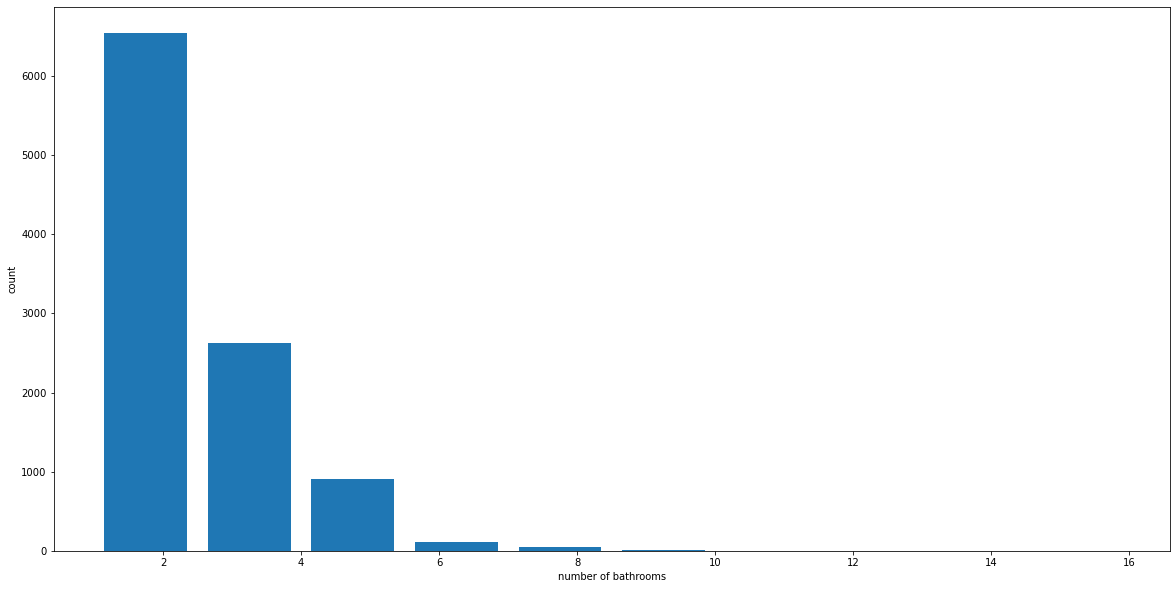

In [143]:
#WE NOTICE SOME DATA POINTS HAVE: NUMBER OF BATHROOMS> NUMBER OF BHK
#HISTOGRAM:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

# Analyse the relation between the bedroom number and bathrooms numbers

Remove houses that have bathrooms 2 plus more than no. of bedrooms.

In [144]:
#MAXIMUM VALUE ARE BTW (2 TO 4)
df8[df8.bath>df8.bhk+2]
#ALL ARE OUTLIERS

,location,size,total_sqft,bath,price,bhk,prices_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [145]:
# DROPPING SOME FEATURES WHICH ARE UNNECESSARY
df9= df8[df8.bath<df8.bhk+2]
df9.shape

(10147, 7)

In [146]:
#Drop price_per_sqft
df10 = df9.drop(['size','prices_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


### MODEL BUILDING

In [147]:
# creating dummies for location
# NOW ALL OUR COLUMNS ARE NUMERICAL EXCEPT FOR "LOCATION". THEREFORE WE WOULD USE ONE HOT ENCODING OR DUMMIES TO CONVERT CATEGORICAL TO NUMERICAL
dummies=pd.get_dummies(df10.location)
location_cat = pd.get_dummies(df10.location)
dummies.head(3)
# Always do this for categorical data
# Here since the columns is not a level catergorical column(high low medium...) we use one hot encoding

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Appending int dataframe:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
#WHILE CONCATING WE USUALLY DROP A COLUMN HENCE WE DROPPED "OTHER" FROM DUMMIES DATAFRAME
#DROPPING OCATION COLUMN
df12=df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
#Observe how the number of rows remained same just the columns increased.
df12.shape

(10147, 245)

### TEST TRAIN AND SPLIT

In [151]:
X=df12.drop('price',axis='columns')#independent vraiable
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# assigning x and y values (feature and target)
y=df12.price#dependent variable
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [153]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

### LINEAR REGRESSION

In [154]:
# building linear regression model and fitting it with the training dataset
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7914298205261528

### K FOLD CROSS VALIDATION

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
 
cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

### GRID SEARCH CV(ALL IN ONE FUNCTION)

In [156]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
# Dictionary contains all regression algorithms that we want to train and its hyperparameters that we want to tune.
def find_best_model_using_gridsearchcv(X,y):
    algos ={
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)  
    
    
    
    

,model,best_score,best_params
0,linear_regression,0.797772,{'normalize': True}
1,Lasso,0.665151,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.716597,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Making Predictions

In [157]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [158]:
#WE SEE LINEAR REGRESSION IS THE BEST WITH NORMALIZE=FALSE
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [159]:
predict_price('1st Block Jayanagar',1000,2,2)

186.4341482346855

In [160]:
predict_price('1st Phase JP Nagar',1000,2,3)

83.96877152695424

In [161]:
predict_price('5th Block Hbr Layout',1000,3,2)

37.611716023149064

In [162]:
predict_price("1st Block Jayanagar",1000,3,2)

193.00851608630973

In [163]:
predict_price("Vishveshwarya Layout",1000,3,2)

29.88146895317913

# Conclusion:
From the above made model, we can conclude that the Linear Regression algorithm performs better in performing prediction of the real-estate price than Lasso Regressor and Decision Tree Regressor with an accuracy of 82% and in some cases it increased upto 89%.


Hence a high accuracy model was build with basic data cleaning steps and machine learning algorithms.

# Save the model
Export the tested model to a pickle file

In [164]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(lr_clf, fh)

In [165]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [166]:
cat = df12.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) 

In [167]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))

In [168]:
import json
columns = {
    'data_columns': [col for col in X.columns]
}
with open("banglore_home_prices_prediction_columns.json","w") as f:
    f.write(json.dumps(columns))